In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.datasets import cifar10

In [59]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [61]:
#0. Airplanes
#1. Cars
#2. Birds
#3. Cats
#4. Deers
#5. Dogs
#6. Frogs
#7. Horses
#8. Ships
#9. Trucks

In [64]:
X_train.shape

(50000, 32, 32, 3)

In [66]:
#50,000 images, each image consists 32x32 and 3 channels

In [68]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
#Data Visualization

[0]


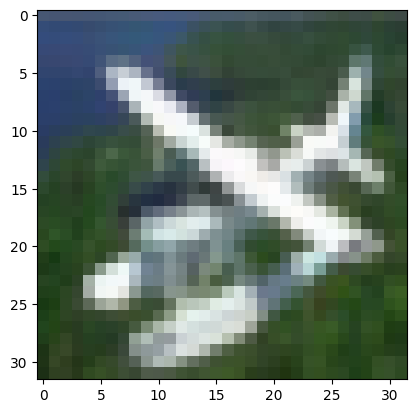

In [10]:
i = 2345
plt.imshow(X_train[i])
print(y_train[i]) #x represents the image, y represents the class

In [11]:
W_grid = 15

In [12]:
L_grid = 15

/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


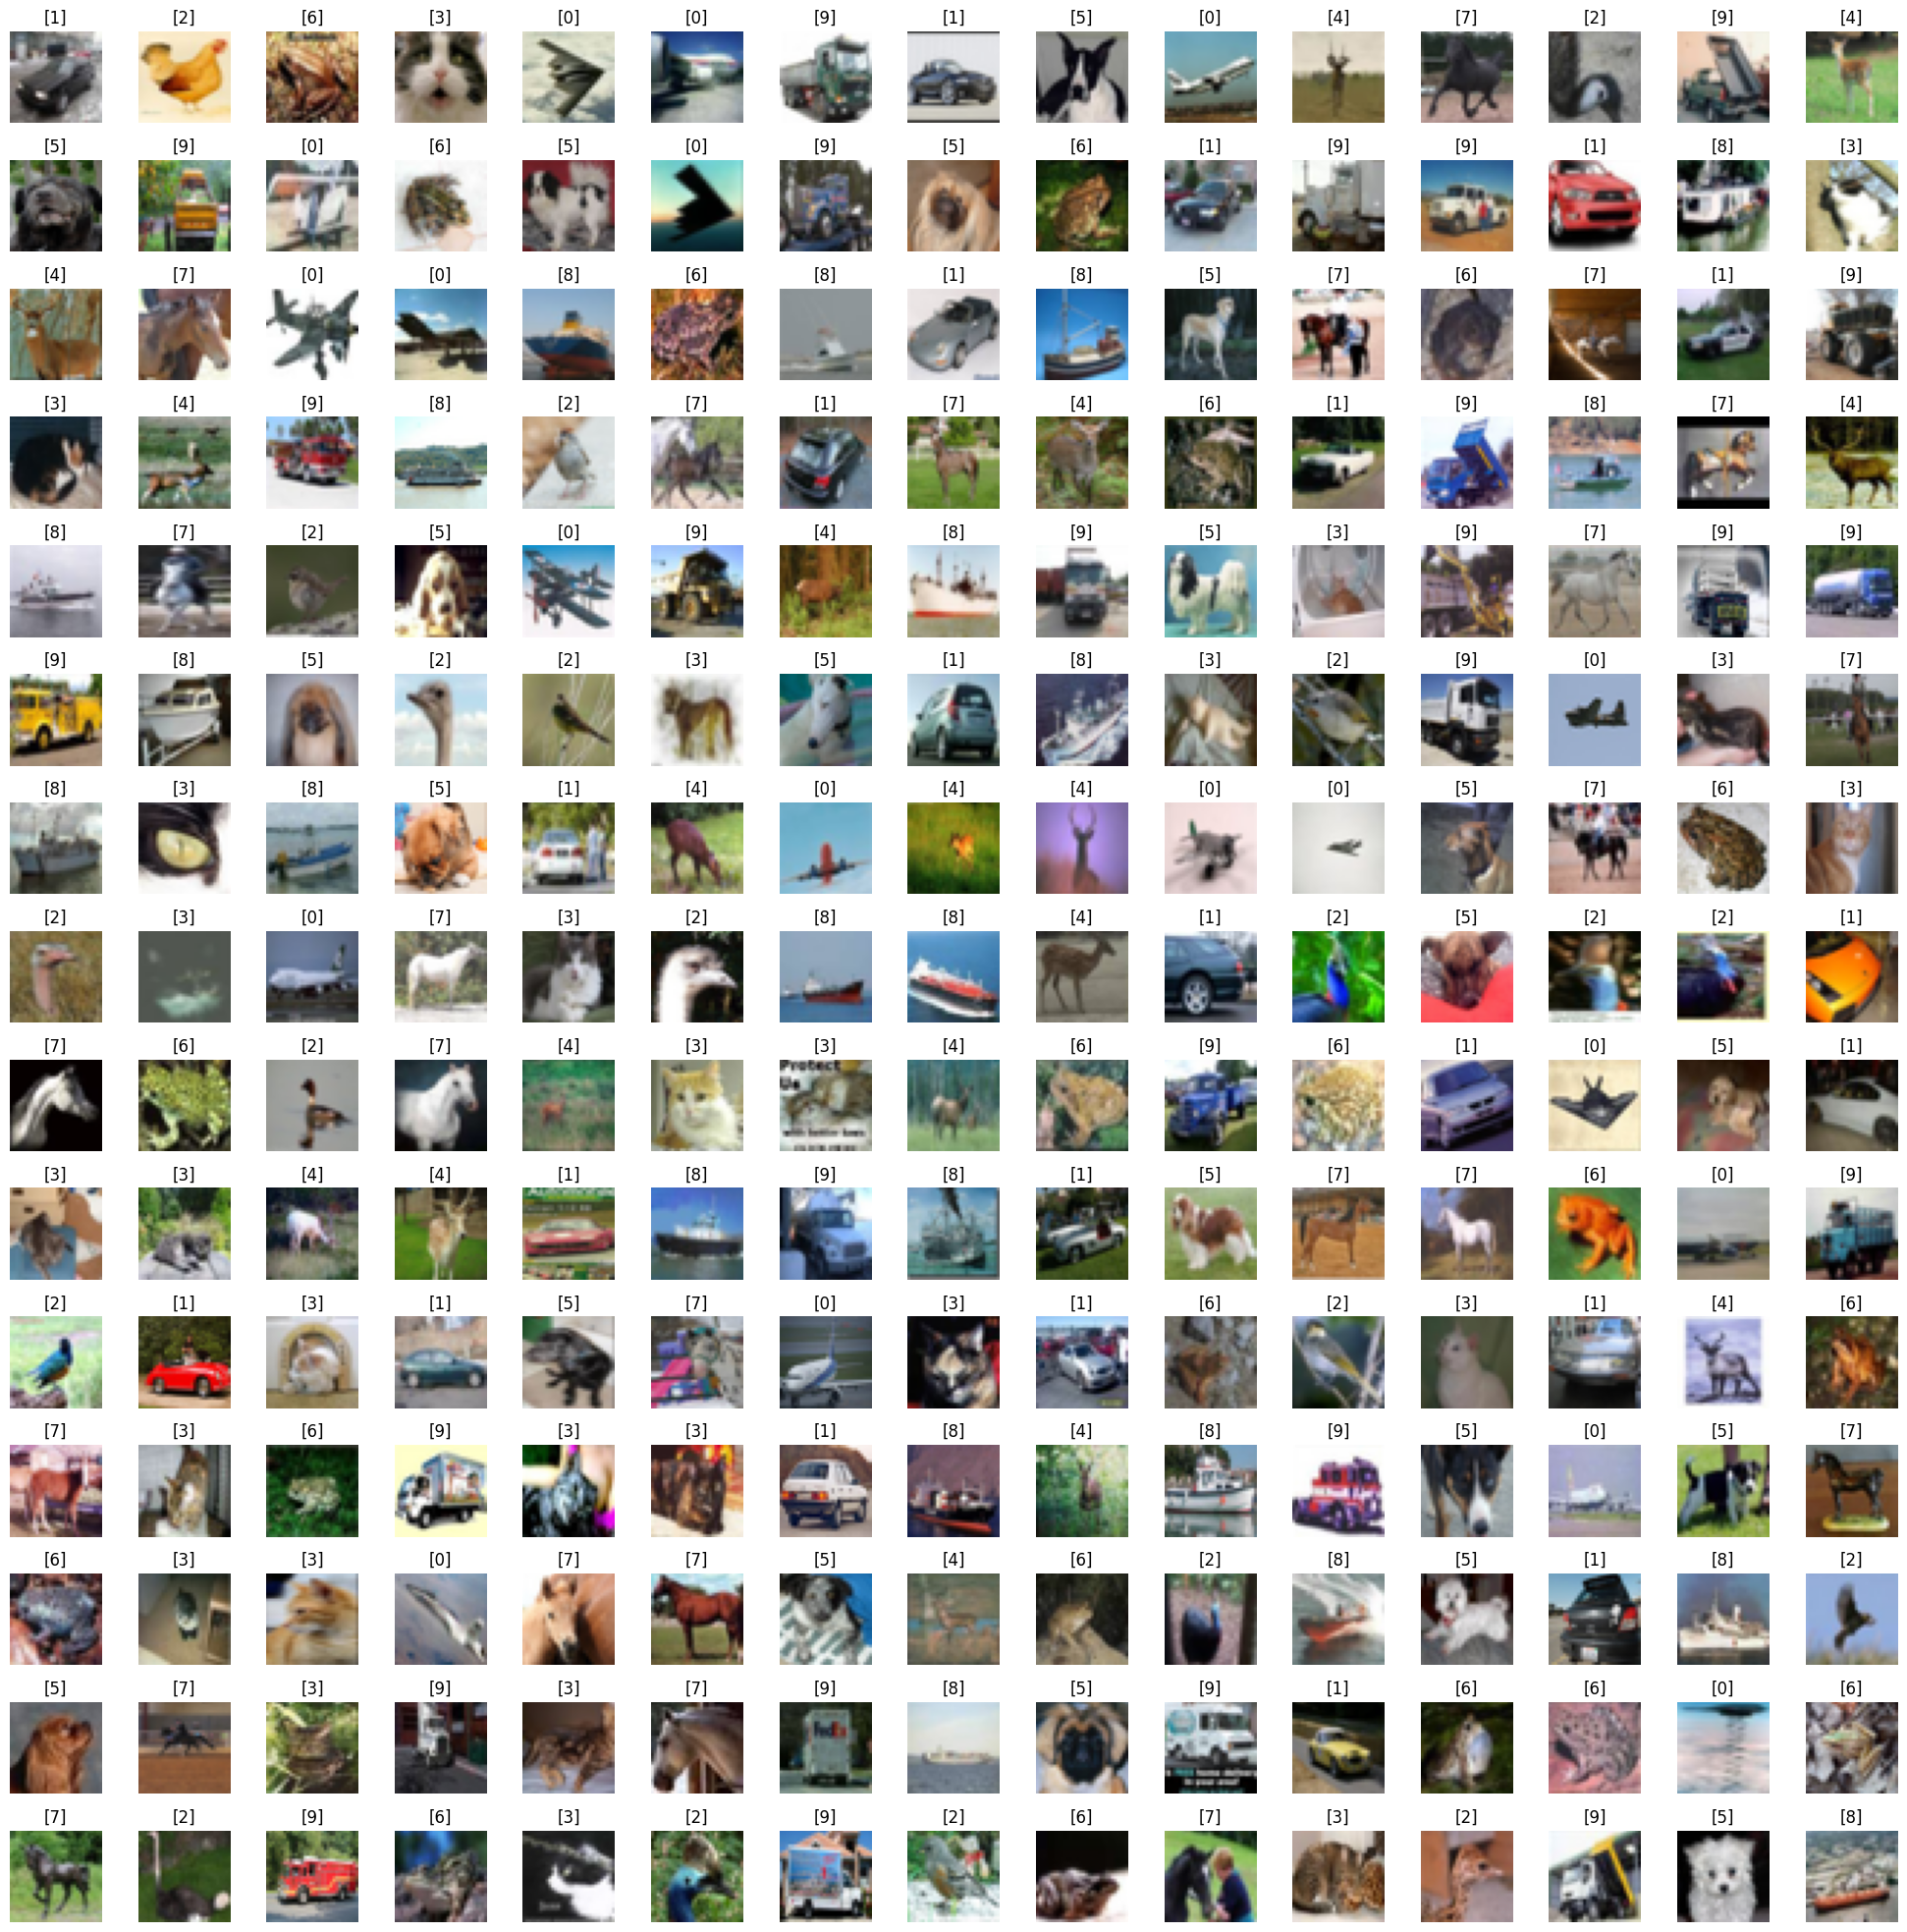

In [13]:
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for x in np.arange(0, L_grid * W_grid): # Adding a random image in each cell in the 15x15 grid
    index = np.random.randint(0, n_training) # Picking a random number
    axes[x].imshow(X_train[index])
    axes[x].set_title(y_train[index])
    axes[x].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [14]:
n_training

50000

In [15]:
# Data preparation

In [76]:
X_train = X_train.astype('float32')
X_train = X_test.astype('float32')

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [17]:
number_cat = 10

In [18]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [70]:
X_train.shape

(50000, 32, 32, 3)

In [72]:
Input_shape = X_train.shape[1:]

In [74]:
Input_shape

(32, 32, 3)